In [2]:

import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## This is a notebook for analyzing the occurrence of different types of acts in crisis discourses within social media comments to crisis videos.

The input is a .csv file containing weekly frequencies of different acts in YouTube comments to crisis videos. Here, we use time series analysis to investigate whether the frequencies of specific acts significantly vary at different times. We conduct a time-series analysis, and identify where specific act frequencies go over our significance threshold (SD*2 over group mean), to see which time periods should be analyzed more carefully.


In [23]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.style.use('default') # or seaborn-colorblind or #seaborn-deep

df = pd.read_csv('NDTV_phase2_multilabel_t5.csv')  
# Convert the date column to a datestamp type
df['Week'] = pd.to_datetime(df['Week'])
#df = df.drop(columns='Row index')

weekslist = df['Week'].tolist()
admit = df['acceptance'].tolist()
deny = df['rejection'].tolist()
apol = df['apology'].tolist()
que = df['question'].tolist()
chal = df['challenge'].tolist()
state = df['informing statement'].tolist()
req = df['request'].tolist()
appr = df['appreciation'].tolist()
nropost = df['Nro of all posts'].tolist()



In [24]:
def get_differences_from_mean(act_list):
    act_mean = np.mean(act_list)
    print(act_mean)

    meansdiff=[]
    for item in act_list:
        diff = item - act_mean
        meansdiff.append(diff)
    return meansdiff

def get_differences_from_median(act_list):
    act_mean = np.median(act_list)

    meansdiff=[]
    for item in act_list:
        diff = item - act_mean
        meansdiff.append(diff)
    return meansdiff

print(sum(nropost))
print(len(weekslist))



74196
28


In [25]:
i = 0
for item in que:
    try:
        que[i] = (item/(nropost[i])) 
    except:
        que[i] = float(0.0)
    i += 1


i = 0
for item in chal:
    try:
        chal[i] = (item/(nropost[i]))
    except:
        chal[i] = float(0.0)
    i += 1

i = 0
for item in state:
    try:
        state[i] =(item/(nropost[i]))
    except:
        state[i] = float(0.0)
    i += 1

i = 0
for item in req:
    try:
        req[i] = (item/(nropost[i]))
    except:
        req[i] = float(0.0)
    i += 1

i = 0
for item in appr:
    try:
        appr[i] = (item/(nropost[i])) 
    except:
        appr[i] = float(0.0)
    i += 1


i = 0
for item in deny:
    try:
        deny[i] = (item/(nropost[i]))
    except:
        deny[i] = float(0.0)
    i += 1


i = 0
for item in admit:
    try:
        admit[i] = (item/(nropost[i]))
    except:
        admit[i] = float(0.0)
    i += 1



i = 0
for item in apol:
    try:
        apol[i] = (item/(nropost[i]))
    except:
        apol[i] = float(0.0)
    i += 1


df.loc[[0]]

,Unnamed: 0,Week,Nro of all posts,question,question percentage,challenge,accusation,request,acceptance,denial,...,admission percentage,rejection percentage,appreciation percentage,informing statement percentage,apology percentage,denial percentage,acceptance percentage,request percentage,accusation percentage,challenge percentage
0,0,2021-02-01,48,7,0.145833,11,0,4,1,0,...,0.0,0.041667,0.125,0.645833,0.0,0.0,0.020833,0.083333,0.0,0.229167


In [29]:
data = []

#dropping weekly data with < 100 comments, and getting differences from group mean:

que_diff = get_differences_from_mean(que[2:22]) 
chal_diff = get_differences_from_mean(chal[2:22])
state_diff = get_differences_from_mean(state[2:22])

req_diff = get_differences_from_mean(req[2:22]) 
appr_diff = get_differences_from_mean(appr[2:22])
deny_diff = get_differences_from_mean(deny[2:22])
admit_diff = get_differences_from_mean(admit[2:22])
apol_diff = get_differences_from_mean(apol[2:22])

df = pd.DataFrame(data, columns = [])
df.insert(0, 'Weeks', weekslist[2:22])
df.insert(1, 'Question', que_diff)
df.insert(2, 'Challenge', chal_diff)
df.insert(3, 'Statement', state_diff)

df.insert(4, 'Request', req_diff)
df.insert(5, 'Appreciation', appr_diff)
df.insert(6, 'Denial', deny_diff)
df.insert(7, 'Acceptance', admit_diff)
df.insert(8, 'Apology', apol_diff)


print(nropost)
print(sum(nropost))
df.loc[[0]]


0.07942516822534709
0.2616348951821643
0.7159848411925294
0.12042450815169008
0.0692721747108867
0.022253556465770458
0.012187913959514702
0.0009220616328105217
[48, 135, 553, 222, 678, 402, 721, 1350, 3732, 8195, 9018, 12177, 5265, 8321, 13445, 3513, 1851, 1607, 770, 949, 418, 291, 121, 121, 85, 93, 61, 54]
74196


,Weeks,Question,Challenge,Statement,Request,Appreciation,Denial,Acceptance,Apology
0,2021-02-16,-0.039642,-0.01932,0.018192,0.015199,-0.025873,0.004871,-0.001338,-0.000922


In [27]:
df['Weeks'] = pd.to_datetime(df['Weeks'])

print(df['Weeks'])

0    2021-02-16
1    2021-02-24
2    2021-03-01
3    2021-03-08
4    2021-03-16
5    2021-03-24
6    2021-04-01
7    2021-04-09
8    2021-04-17
9    2021-04-25
10   2021-05-01
11   2021-05-09
12   2021-05-17
13   2021-05-25
14   2021-06-01
15   2021-06-09
16   2021-06-17
17   2021-06-25
18   2021-07-01
19   2021-07-09
Name: Weeks, dtype: datetime64[ns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


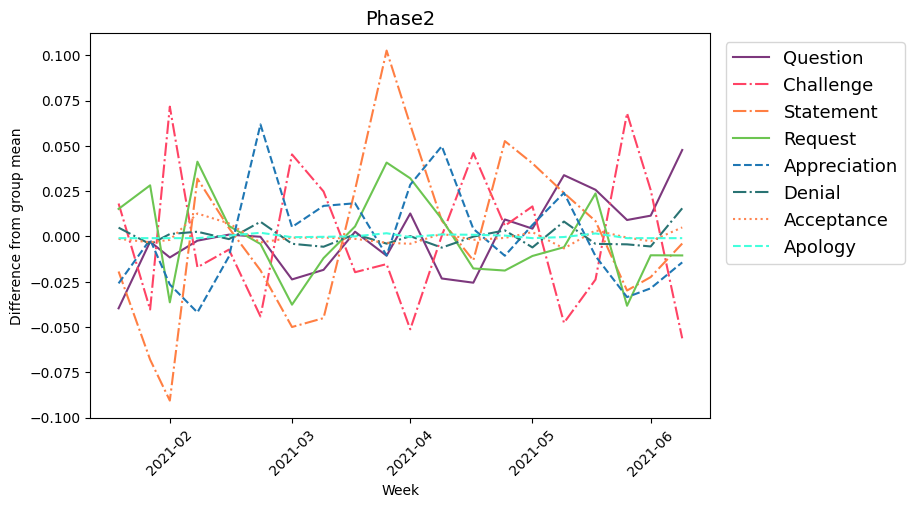

In [28]:
#use 2*SD over mean or median as threshold. See article by Leis et al., 2013.
import numpy as np

# Set the date column as the index of your DataFrame meat
acts = df.set_index('Weeks')

# Print the summary statistics of the DataFrame
#print(acts.describe())

plt.rcParams["figure.figsize"] = (12,6)


stdprob = float(df['Question'].std()) 
meanact= float(df['Question'].mean())
stdprob3 = float(df['Challenge'].std()) 
meanact3= float(df['Challenge'].median())
stdprob4 = float(df['Statement'].std()) 
meanact4= float(df['Statement'].mean())

stdprob5 = float(df['Request'].std()) 
meanact5= float(df['Request'].mean())
stdprob6 = float(df['Appreciation'].std()) 
meanact6= float(df['Appreciation'].median())
stdprob7 = float(df['Acceptance'].std()) 
meanact7= float(df['Acceptance'].median())
stdprob8 = float(df['Denial'].std()) 
meanact8= float(df['Denial'].mean())
stdprob9 = float(df['Apology'].std()) 
meanact9= float(df['Apology'].mean())
# Plot time series dataset

#t = np.linspace(125, 56, 125)
#ax = acts.plot(linewidth=2, fontsize=14, title = "Phase 2");
#ax.title("Phase 1")
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 5))  #fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.family':'sans-serif'})
#plt.rcParams.update({'font.sans-serif':'Helvetica'})
#axb = ax.twinx()

# Same as above
ax.set_xlabel('Week')
ax.set_ylabel('Difference from group mean')
ax.set_title('Phase2', fontsize=14)
ax.grid(False)

 

ax.plot(df.Weeks, df.Question, color='#7D387D', label='Question')
ax.plot(df.Weeks, df.Challenge, color='#FF4365', linestyle='-.', label='Challenge')
ax.plot(df.Weeks, df.Statement, color='#ff7f43', linestyle='-.', label='Statement') #coral: #FF8552 

ax.plot(df.Weeks, df.Request, color='#6CC551', label='Request')
ax.plot(df.Weeks, df.Appreciation, color='#1F77b4', linestyle='--', label='Appreciation') ##6CC551  pink #FF4365
ax.plot(df.Weeks, df.Denial, color='#297373', linestyle='-.', label='Denial')
ax.plot(df.Weeks, df.Acceptance, color='#FF8552', linestyle=':', label='Acceptance') #coral: #FF8552 
ax.plot(df.Weeks, df.Apology, color='#43ffdd', linestyle='--', label='Apology') ##6CC551  pink #FF4365



import matplotlib.pyplot as plt

# Additional customizations

ax.set_xlabel('Week');
#ax.set_facecolor('#EAEAEA');
ax.legend(fontsize=20);
#ax.legend(bbox_to_anchor =(0.97, 1.25))
ax.legend(fontsize=13,bbox_to_anchor=(1.01, 1),loc='upper left')   
plt.xticks(rotation = 45)
#plt.figure(dpi=1200)

plt.savefig('Phase2_dark_2timesSD_platin.png', dpi=1200,  bbox_inches='tight') #, dpi=300)
plt.savefig('Phase2_dark_2timesSD_platin.eps',  bbox_inches='tight', format='eps', transparent=True)
plt.savefig("Phase2_dark_2timesSD_platin.svg", format="svg",transparent=True)
plt.savefig("Phase2_dark_2timesSD_platin.pdf", format="pdf",transparent=True)

In [34]:
#Example of how to identify significant peaks (2*SD over group mean)

stdprob_reso = float(df['Question'].std()) 
meanact_reso= float(df['Question'].mean())


i = 0
for item in df['Question']:
    group = "Question"
    limit = meanact_reso + (2*stdprob_reso)
    if float(item) > limit:
        print(group)
        print(item)
        print(i)
    i += 1
    
   

Question
0.047722598097676955
19
